In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data[data.columns[1:]]
y = data.Activity

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)
X_train.shape, X_test.shape

((750, 1776), (3001, 1776))

In [19]:
def sigma(y_pred):
    from math import e
    return 1. / (1 + e ** (-y_pred))

      Iter       Train Loss   Remaining Time 
         1           1.0190           12.54s
         2           0.9192           12.12s
         3           0.8272           11.31s
         4           0.7834            9.92s
         5           0.7109            9.43s
         6           0.6368            9.73s
         7           0.5797            9.49s
         8           0.5610            8.80s
         9           0.5185            8.55s
        10           0.4984            8.11s
        20           0.1999            7.56s
        30           0.1313            6.62s
        40           0.0790            6.25s
        50           0.0511            5.97s
        60           0.0352            5.65s
        70           0.0245            5.26s
        80           0.0162            4.96s
        90           0.0114            4.62s
       100           0.0077            4.36s
       200           0.0004            1.27s
      Iter       Train Loss   Remaining Time 
        

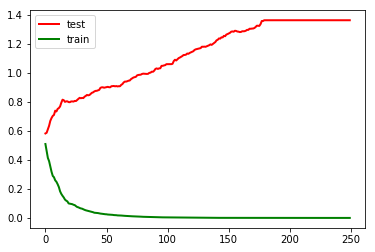

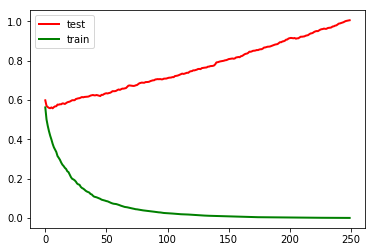

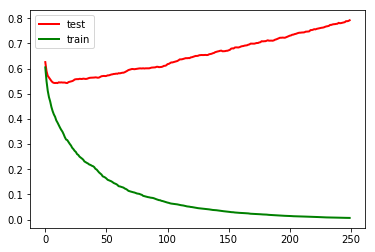

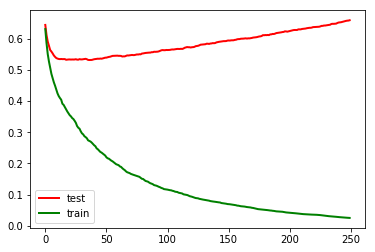

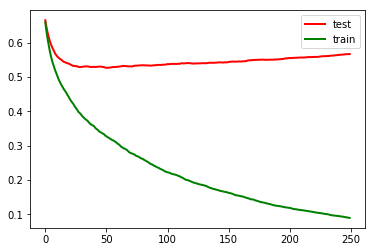

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    gbc = GradientBoostingClassifier(learning_rate = learning_rate, n_estimators = 250, verbose = True, random_state = 241)
    gbc.fit(X_train, y_train)
    pred_train = list(gbc.staged_decision_function(X_train.values))
    pred_test = list(gbc.staged_decision_function(X_test.values))
    pred_train = list(map(sigma, pred_train))
    pred_test = list(map(sigma, pred_test))
    train_loss = [log_loss(y_train, i) for i in pred_train]
    test_loss = [log_loss(y_test, i) for i in pred_test] 
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [23]:
gbc = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 250, verbose = True, random_state = 241)
gbc.fit(X_train, y_train)
pred_test = list(gbc.staged_decision_function(X_test.values))
pred_test = list(map(sigma, pred_test))
test_loss = [(log_loss(y_test, pred_test[i]), i) for i in range(len(pred_test))]
print(sorted(test_loss))

      Iter       Train Loss   Remaining Time 
         1           1.2613           12.23s
         2           1.1715           11.77s
         3           1.1009           11.93s
         4           1.0529           11.72s
         5           1.0130           11.94s
         6           0.9740           12.14s
         7           0.9475           11.26s
         8           0.9197           11.19s
         9           0.8979           10.63s
        10           0.8730           10.55s
        20           0.7207            8.44s
        30           0.6055            7.63s
        40           0.5244            7.06s
        50           0.4501            6.56s
        60           0.3908            6.20s
        70           0.3372            5.89s
        80           0.3009            5.51s
        90           0.2603            5.17s
       100           0.2327            4.78s
       200           0.0835            1.48s
[(0.53145079631906378, 36), (0.53171128877206142, 38),

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 36, random_state = 241)
rfc.fit(X_train, y_train)
pred = rfc.predict_proba(X_test)
log_loss(y_test, pred)

0.54138128618040693